In [ ]:
import tensorflow as tf



In [ ]:
base_path ="drive/My Drive/ML Projects/Flower Classification/flowers"


In [ ]:
batch_size = 32
img_height = 256
img_width = 256
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  base_path,
  label_mode="categorical",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4323 files belonging to 5 classes.
Using 3459 files for training.


In [ ]:
class_names = train_ds.class_names

In [ ]:
train_ds

<BatchDataset shapes: ((None, 256, 256, 3), (None, 5)), types: (tf.float32, tf.float32)>

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  base_path,
  label_mode="categorical",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4323 files belonging to 5 classes.
Using 864 files for validation.


In [ ]:
for image_batch_train, labels_batch_train in train_ds:
  print(image_batch_train.shape)
  print(labels_batch_train.shape)
  break

(32, 256, 256, 3)
(32, 5)


In [ ]:
for image_batch_val, labels_batch_val in val_ds:
  print(image_batch_val.shape)
  print(labels_batch_val.shape)
  break

(32, 256, 256, 3)
(32, 5)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation_datagen = ImageDataGenerator( rescale = 1.0/255. )


train_generator = train_datagen.flow(image_batch_train,
                                     labels_batch_train)    
validation_generator =  validation_datagen.flow( image_batch_val,
                                                labels_batch_val)

In [ ]:

from tensorflow.python.keras.models import Sequential, Model
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D 
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import ResNet50

In [ ]:
def create_model_from_scratch():
  model = tf.keras.Sequential([
          tf.keras.layers.Conv2D(32,(3,3),padding='same',input_shape=image_batch_train.shape[1:],activation='relu', name='conv_1'),
          tf.keras.layers.Conv2D(32,(3,3),activation='relu',name='conv_2'),
          tf.keras.layers.MaxPooling2D((2,2),name='maxpool_1'),
          tf.keras.layers.Dropout(0.25),

          tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu',name='conv_3'),
          tf.keras.layers.Conv2D(64,(3,3),activation='relu',name='conv_4'),
          tf.keras.layers.MaxPooling2D((2,2),name='maxpool_2'),
          tf.keras.layers.Dropout(0.25),

           tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu',name='conv_5'),
          tf.keras.layers.Conv2D(128,(3,3),activation='relu',name='conv_6'),
          tf.keras.layers.MaxPooling2D((2,2),name='maxpool_3'),
          tf.keras.layers.Dropout(0.25),


          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(512,activation='relu',name='dense_1'),
          tf.keras.layers.Dropout(0.25),
          tf.keras.layers.Dense(128,activation='relu',name='dense_2'),
          tf.keras.layers.Dense(5, activation='softmax',name='output')])
  
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc']) # optimizer=RMSprop(lr=0.001)

  return model

In [ ]:
img_width, img_height = 256, 256

def create_model_from_VGG19():

  model= VGG19(weights='imagenet',include_top=False,input_shape=(img_width,img_height,3))
  for layer in model.layers:
    layer.trainable = False
  #last_layer = pre_trained_model.get_layer('mixed7')
  #print('last layer output shape: ', last_layer.output_shape)
  #last_output = last_layer.output

  x = model.output
  x = Flatten()(x)
  x = Dense(1024, activation="relu")(x)
  x = Dropout(0.5)(x)
  x = Dense(1024, activation="relu")(x)
  predictions = Dense(5, activation="softmax")(x)

  final_model = Model(inputs=model.input, outputs= predictions)
    
  final_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc']) # optimizer=RMSprop(lr=0.001)
    
  return final_model

In [ ]:
def create_model_from_Resnet50():

    model = Sequential()

    model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))
    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Dense(2048, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(5, activation='softmax'))

    model.layers[0].trainable = False
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc']) # optimizer=RMSprop(lr=0.001)
    
    return model

In [ ]:
model_scratch = create_model_from_scratch()
model_scratch.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
conv_2 (Conv2D)              (None, 254, 254, 32)      9248      
_________________________________________________________________
maxpool_1 (MaxPooling2D)     (None, 127, 127, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 127, 127, 32)      0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 127, 127, 64)      18496     
_________________________________________________________________
conv_4 (Conv2D)              (None, 125, 125, 64)      36928     
_________________________________________________________________
maxpool_2 (MaxPooling2D)     (None, 62, 62, 64)        0

In [ ]:
model_VGG19 = create_model_from_VGG19()

model_VGG19.summary()

80142336/80134624 [==============================] - 0s 0us/step
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_______________________________________________________

In [ ]:
model_Resnet50 = create_model_from_Resnet50()

model_Resnet50.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
dense_3 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
batch_normalization_1 (Batch (None, 2048)              8192      
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              2098176   
_______________________________________________________

In [ ]:
batch_size = 20
epochs1 = 50
epochs2 = 10
epochs3 = 30
model_scratch_info = model_scratch.fit_generator(
    generator=train_generator,   # -> 106 # images 3392 = steps * batch_size = 106 * 32 
    epochs=50, # -> 26 # images 832 = steps * batch_size = 26 * 32
    validation_data=validation_generator, 
    verbose=2)

Epoch 1/50
1/1 - 3s - loss: 1.3424 - acc: 0.4688 - val_loss: 1.5178 - val_acc: 0.3438
Epoch 2/50
1/1 - 3s - loss: 1.3384 - acc: 0.4688 - val_loss: 1.5096 - val_acc: 0.3438
Epoch 3/50
1/1 - 3s - loss: 1.3650 - acc: 0.4688 - val_loss: 1.4964 - val_acc: 0.3438
Epoch 4/50
1/1 - 3s - loss: 1.3668 - acc: 0.4688 - val_loss: 1.4979 - val_acc: 0.3438
Epoch 5/50
1/1 - 3s - loss: 1.3143 - acc: 0.4688 - val_loss: 1.4902 - val_acc: 0.3438
Epoch 6/50
1/1 - 3s - loss: 1.3526 - acc: 0.4688 - val_loss: 1.4994 - val_acc: 0.3438
Epoch 7/50
1/1 - 3s - loss: 1.3210 - acc: 0.4688 - val_loss: 1.4941 - val_acc: 0.3438
Epoch 8/50
1/1 - 3s - loss: 1.2876 - acc: 0.5000 - val_loss: 1.4876 - val_acc: 0.3750
Epoch 9/50
1/1 - 3s - loss: 1.2573 - acc: 0.5000 - val_loss: 1.4878 - val_acc: 0.3750
Epoch 10/50
1/1 - 3s - loss: 1.2736 - acc: 0.4375 - val_loss: 1.4799 - val_acc: 0.3750
Epoch 11/50
1/1 - 3s - loss: 1.2011 - acc: 0.5312 - val_loss: 1.4967 - val_acc: 0.3750
Epoch 12/50
1/1 - 3s - loss: 1.1061 - acc: 0.5312 - 

In [ ]:
model_VGG19_info = model_VGG19.fit_generator(
    generator=train_generator,   # -> 106 # images 3392 = steps * batch_size = 106 * 32 
    epochs=20, # -> 26 # images 832 = steps * batch_size = 26 * 32
    validation_data=validation_generator,
    verbose=2
)

Epoch 1/20
1/1 - 26s - loss: 1.8307 - acc: 0.1562 - val_loss: 19.6318 - val_acc: 0.3438
Epoch 2/20
1/1 - 26s - loss: 16.5522 - acc: 0.4688 - val_loss: 25.3527 - val_acc: 0.1875
Epoch 3/20
1/1 - 26s - loss: 25.8001 - acc: 0.1875 - val_loss: 9.2873 - val_acc: 0.2812
Epoch 4/20
1/1 - 26s - loss: 10.3936 - acc: 0.1562 - val_loss: 3.3860 - val_acc: 0.3438
Epoch 5/20
1/1 - 26s - loss: 1.9428 - acc: 0.5312 - val_loss: 5.6429 - val_acc: 0.3438
Epoch 6/20
1/1 - 26s - loss: 4.0149 - acc: 0.5312 - val_loss: 6.0780 - val_acc: 0.1250
Epoch 7/20
1/1 - 26s - loss: 4.6042 - acc: 0.3125 - val_loss: 3.9587 - val_acc: 0.5000
Epoch 8/20
1/1 - 26s - loss: 2.6347 - acc: 0.5000 - val_loss: 4.0461 - val_acc: 0.2812
Epoch 9/20
1/1 - 26s - loss: 2.9209 - acc: 0.4375 - val_loss: 2.5688 - val_acc: 0.5000
Epoch 10/20
1/1 - 26s - loss: 2.3318 - acc: 0.5938 - val_loss: 1.9739 - val_acc: 0.5938
Epoch 11/20
1/1 - 26s - loss: 2.0255 - acc: 0.5312 - val_loss: 2.3441 - val_acc: 0.3750
Epoch 12/20
1/1 - 26s - loss: 2.9813

In [ ]:
model_ResNet50_info = model_Resnet50.fit_generator(
    generator=train_generator,    # -> 106 # images 3392 = steps * batch_size = 106 * 32 
    epochs=30, # -> 26 # images 832 = steps * batch_size = 26 * 32
    validation_data=validation_generator, 
    verbose=2
)

Epoch 1/30
1/1 - 7s - loss: 2.1655 - acc: 0.1875 - val_loss: 2.6738 - val_acc: 0.1875
Epoch 2/30
1/1 - 6s - loss: 2.1102 - acc: 0.6562 - val_loss: 3.9378 - val_acc: 0.1875
Epoch 3/30
1/1 - 6s - loss: 1.5453 - acc: 0.7188 - val_loss: 4.6395 - val_acc: 0.1875
Epoch 4/30
1/1 - 6s - loss: 0.5282 - acc: 0.8125 - val_loss: 4.8933 - val_acc: 0.1875
Epoch 5/30
1/1 - 6s - loss: 1.6049 - acc: 0.7500 - val_loss: 5.0908 - val_acc: 0.1875
Epoch 6/30
1/1 - 6s - loss: 0.9009 - acc: 0.6250 - val_loss: 5.3318 - val_acc: 0.1875
Epoch 7/30
1/1 - 6s - loss: 1.0733 - acc: 0.6562 - val_loss: 5.5486 - val_acc: 0.1875
Epoch 8/30
1/1 - 6s - loss: 0.3725 - acc: 0.8438 - val_loss: 5.6667 - val_acc: 0.1875
Epoch 9/30
1/1 - 6s - loss: 0.8588 - acc: 0.7812 - val_loss: 5.7569 - val_acc: 0.1875
Epoch 10/30
1/1 - 6s - loss: 0.5353 - acc: 0.7812 - val_loss: 5.7875 - val_acc: 0.1875
Epoch 11/30
1/1 - 6s - loss: 0.6375 - acc: 0.7188 - val_loss: 5.8679 - val_acc: 0.1875
Epoch 12/30
1/1 - 6s - loss: 0.2604 - acc: 0.9062 - 

In [ ]:

import matplotlib.pyplot as plt
import numpy as np


def plot_model_history(model_name, history, epochs):
  
  print(model_name)
  plt.figure(figsize=(15, 5))
  
  # summarize history for accuracy
  plt.subplot(1, 2 ,1)
  plt.plot(np.arange(0, len(history['acc'])), history['acc'], 'r')
  plt.plot(np.arange(1, len(history['val_acc'])+1), history['val_acc'], 'g')
  plt.xticks(np.arange(0, epochs+1, epochs/10))
  plt.title('Training Accuracy vs. Validation Accuracy')
  plt.xlabel('Num of Epochs')
  plt.ylabel('Accuracy')
  plt.legend(['train', 'validation'], loc='best')
  
  plt.subplot(1, 2, 2)
  plt.plot(np.arange(1, len(history['loss'])+1), history['loss'], 'r')
  plt.plot(np.arange(1, len(history['val_loss'])+1), history['val_loss'], 'g')
  plt.xticks(np.arange(0, epochs+1, epochs/10))
  plt.title('Training Loss vs. Validation Loss')
  plt.xlabel('Num of Epochs')
  plt.ylabel('Loss')
  plt.legend(['train', 'validation'], loc='best')
  
  
  plt.show()

model_scratch


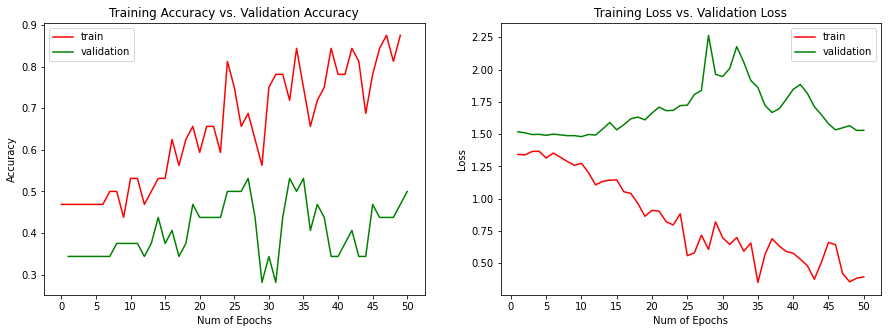

model_VGG19


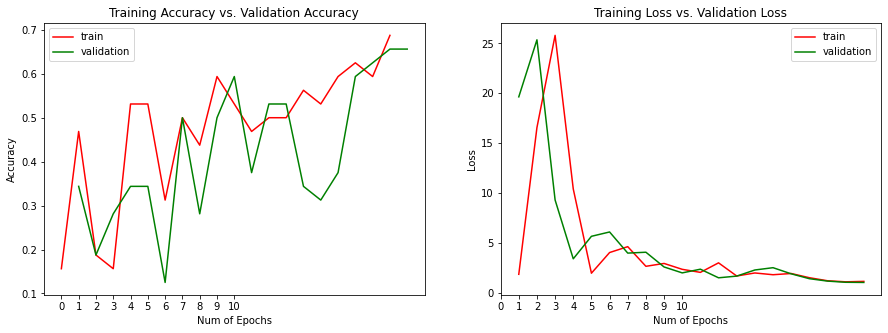

model_ResNet50


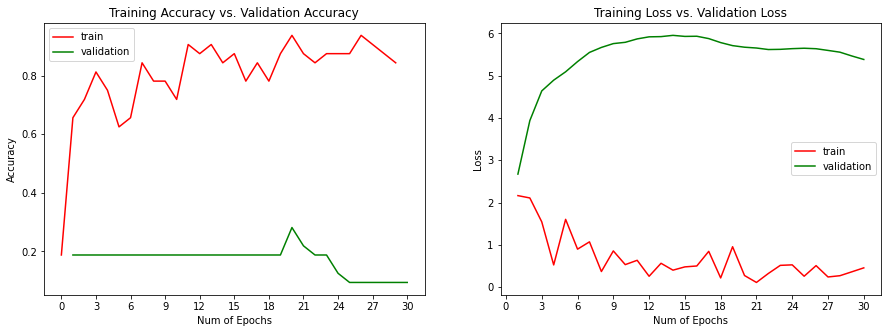

In [ ]:
plot_model_history('model_scratch', model_scratch_info.history, epochs1)
plot_model_history('model_VGG19', model_VGG19_info.history, epochs2)
plot_model_history('model_ResNet50', model_ResNet50_info.history, epochs3)

In [ ]:
def predict_one_image(img, model):
  img = cv2.resize(img, (img_width, img_height), interpolation = cv2.INTER_CUBIC)
  img = np.reshape(img, (1, img_width, img_height, 3))
  img = img/255.
  pred = model.predict(img)
  class_num = np.argmax(pred)
  return class_num, np.max(pred)

rose 73%


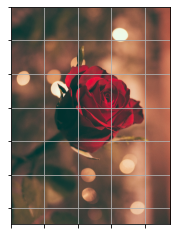

In [ ]:
# idx = 120
# pred, probability = predict_one_image(images[4][idx], model_ResNet50)
def cvtRGB(img):
    return cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)
test_img = cv2.imread('drive/My Drive/Sample/jamie-street-C6CVXJMXwqs-unsplash.jpg')
pred, probability = predict_one_image(test_img, model_VGG19)
print('%s %d%%' % (class_names[pred], round(probability, 2) * 100))
_, ax = plt.subplots(1)
plt.imshow(cvtRGB(test_img))
# Turn off tick labels
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.grid('off')
plt.show()

In [ ]:
from tensorflow import keras
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = keras.preprocessing.image.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model_VGG19.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to daisy with a 40.46 percent confidence.
